In [1]:
import qiskit.qasm2

from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import ApplyLayout, TrivialLayout, EnlargeWithAncilla, FullAncillaAllocation
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from algorithm.sabre import OriginalSabreSwap

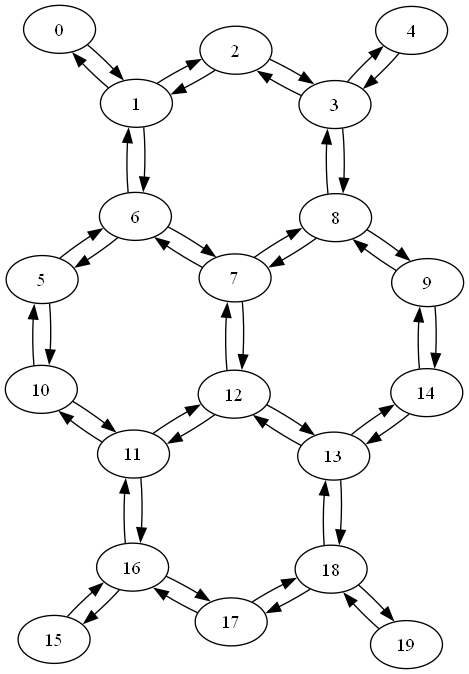

In [2]:
# Import Target provider
provider = FakeAlmadenV2()
coupling_map = CouplingMap(provider.configuration().coupling_map)

coupling_map.draw()

In [3]:
# import the qasm file
circuit = qiskit.qasm2.load('../data/4mod5-v1_23.qasm')

# Apply the SabreSwap
transpile_pass_manager = PassManager([
    TrivialLayout(coupling_map), # Using TrivialLayout as a starting point
    FullAncillaAllocation(coupling_map), # Allocate ancilla qubits for putting in the sabre swap
    EnlargeWithAncilla(), # Enlarge the circuit with ancilla qubits
    ApplyLayout(), # Apply the layout to the circuit
    OriginalSabreSwap(coupling_map),
])

# Not applying the SabreSwap
original_pass_manager = PassManager([
    TrivialLayout(coupling_map), # Using TrivialLayout as a starting point
    FullAncillaAllocation(coupling_map), # Allocate ancilla qubits for putting in the sabre swap
    EnlargeWithAncilla(), # Enlarge the circuit with ancilla qubits
    ApplyLayout(), # Apply the layout to the circuit
])

transpiled_circuit = transpile_pass_manager.run(circuit)
original_circuit = original_pass_manager.run(circuit)
print("Original circuit:")
print(original_circuit.draw())
print("Transpiled circuit:")
print(transpiled_circuit.draw())

Original circuit:
         ┌───┐┌───┐                           ┌─────┐          ┌───┐┌───┐     »
q_0 -> 0 ┤ T ├┤ X ├────────────■───────────■──┤ Tdg ├───────■──┤ X ├┤ T ├─────»
         ├───┤└─┬─┘            │           │  └─────┘       │  └─┬─┘└───┘     »
q_1 -> 1 ┤ T ├──┼──────────────┼───────────┼────────────────┼────┼────────────»
         ├───┤  │              │           │                │    │       ┌───┐»
q_2 -> 2 ┤ T ├──┼──────────────┼───────────┼────────────────┼────┼───────┤ X ├»
         ├───┤  │       ┌───┐  │  ┌─────┐┌─┴─┐┌─────┐┌───┐  │    │  ┌───┐└─┬─┘»
q_3 -> 3 ┤ T ├──■───────┤ X ├──┼──┤ Tdg ├┤ X ├┤ Tdg ├┤ X ├──┼────■──┤ T ├──■──»
         ├───┤┌───┐┌───┐└─┬─┘┌─┴─┐└┬───┬┘└───┘└─────┘└─┬─┘┌─┴─┐┌───┐├───┤┌───┐»
q_4 -> 4 ┤ X ├┤ H ├┤ T ├──■──┤ X ├─┤ T ├───────────────■──┤ X ├┤ H ├┤ H ├┤ T ├»
         └───┘└───┘└───┘     └───┘ └───┘                  └───┘└───┘└───┘└───┘»
«                                                                              »
«q_0 -> 0 ───────────